# Visualising data

In [9]:
library(tidyverse) # load needed code libraries
library(gghsci)
finnish_deaths <- read_tsv("Finnish_deaths_1980-2020.tsv", col_types=cols(year='i', sex='f', age='i')) # load data
skvr <- read_tsv("skvr.tsv", col_types=cols(poem_id='c', collector_name='f', collection_year='i', collection_place='f', n_verses='i')) # load data
ceec_people <- read_tsv("ceec_people.tsv", col_types=cols(person_id='c', sex='f', first_name='c', last_name='c', year_of_birth='i', year_of_death='i', living_region='f', societal_rank='f', societal_rank_of_father='f', religion='f', level_of_education='f', letters_sent='i', letters_received='i')) # load data
View(finnish_deaths |> slice_sample(n=5)) # print 5 random rows.
View(skvr |> slice_sample(n=5)) # print 5 random rows.
View(ceec_people |> slice_sample(n=5)) # print 5 random rows.

year,sex,age
<int>,<fct>,<int>
1980,female,79
2005,female,77
1994,male,77
2000,female,89
1997,female,64


poem_id,collector_name,collection_year,collection_place,n_verses
<chr>,<fct>,<int>,<fct>,<int>
SKVR V2 257.,"Borenius, A. A.",1877,Lempaala,15
SKVR I3 2084.,"Paulaharju, Samuli",1911,Vuokkiniemi,4
SKVR XII2 6220.,"Rautell, E. F.",1919,Vihanti,2
SKVR X2 4027.,"Marjanen, Vilho",1913,Ruovesi,3
SKVR V3 1000.,"Neovius, A. D.",1891,Lempaala,7


person_id,sex,first_name,last_name,year_of_birth,year_of_death,living_region,societal_rank,societal_rank_of_father,religion,level_of_education,letters_sent,letters_received
<chr>,<fct>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
KHENRY,Female,Katherine,Henry née Matthews,1629,1707,Abroad,Gentry (lower),Gentry (lower),NA,NA,0,3
AFINCH,Female,Anne,Finch née Hatton,1667,1743,Other,Nobility,Nobility,NA,NA,5,0
WAPASTON,Male,WALTER,PASTON,1455,1479,East Anglia,Gentry (lower),Gentry (lower),NA,Higher,3,0
CHYRNE,Male,CLEMENT,HYRNE,NA,NA,East Anglia,Merchant,NA,NA,NA,1,0
BDUPPA,Male,BRIAN,DUPPA,1589,1662,Other,Clergy (upper),Merchant,Anglican,Higher,39,38


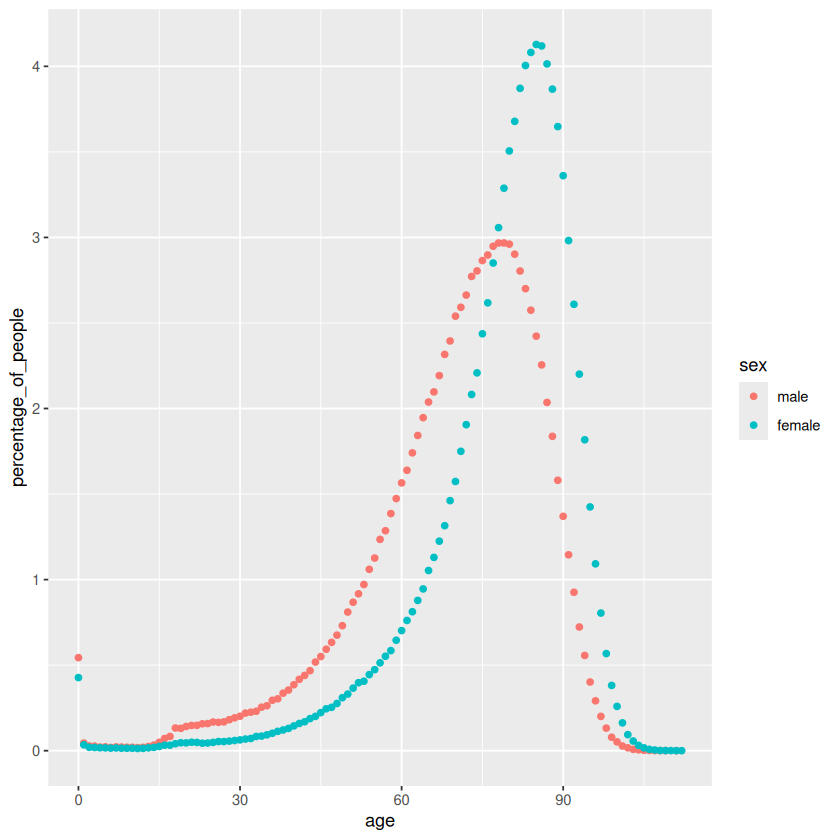

In [19]:
finnish_deaths |>
  group_by(sex, age) |> # group by sex and age
  summarise(n_people=n(), .groups="drop") |> # calculate the number of people dying by sex and age
  group_by(sex) |>
  mutate(percentage_of_people=n_people / sum(n_people) * 100) |>
  ggplot(aes(x=age, y=percentage_of_people, fill=sex, colour=sex)) +
  geom_point()

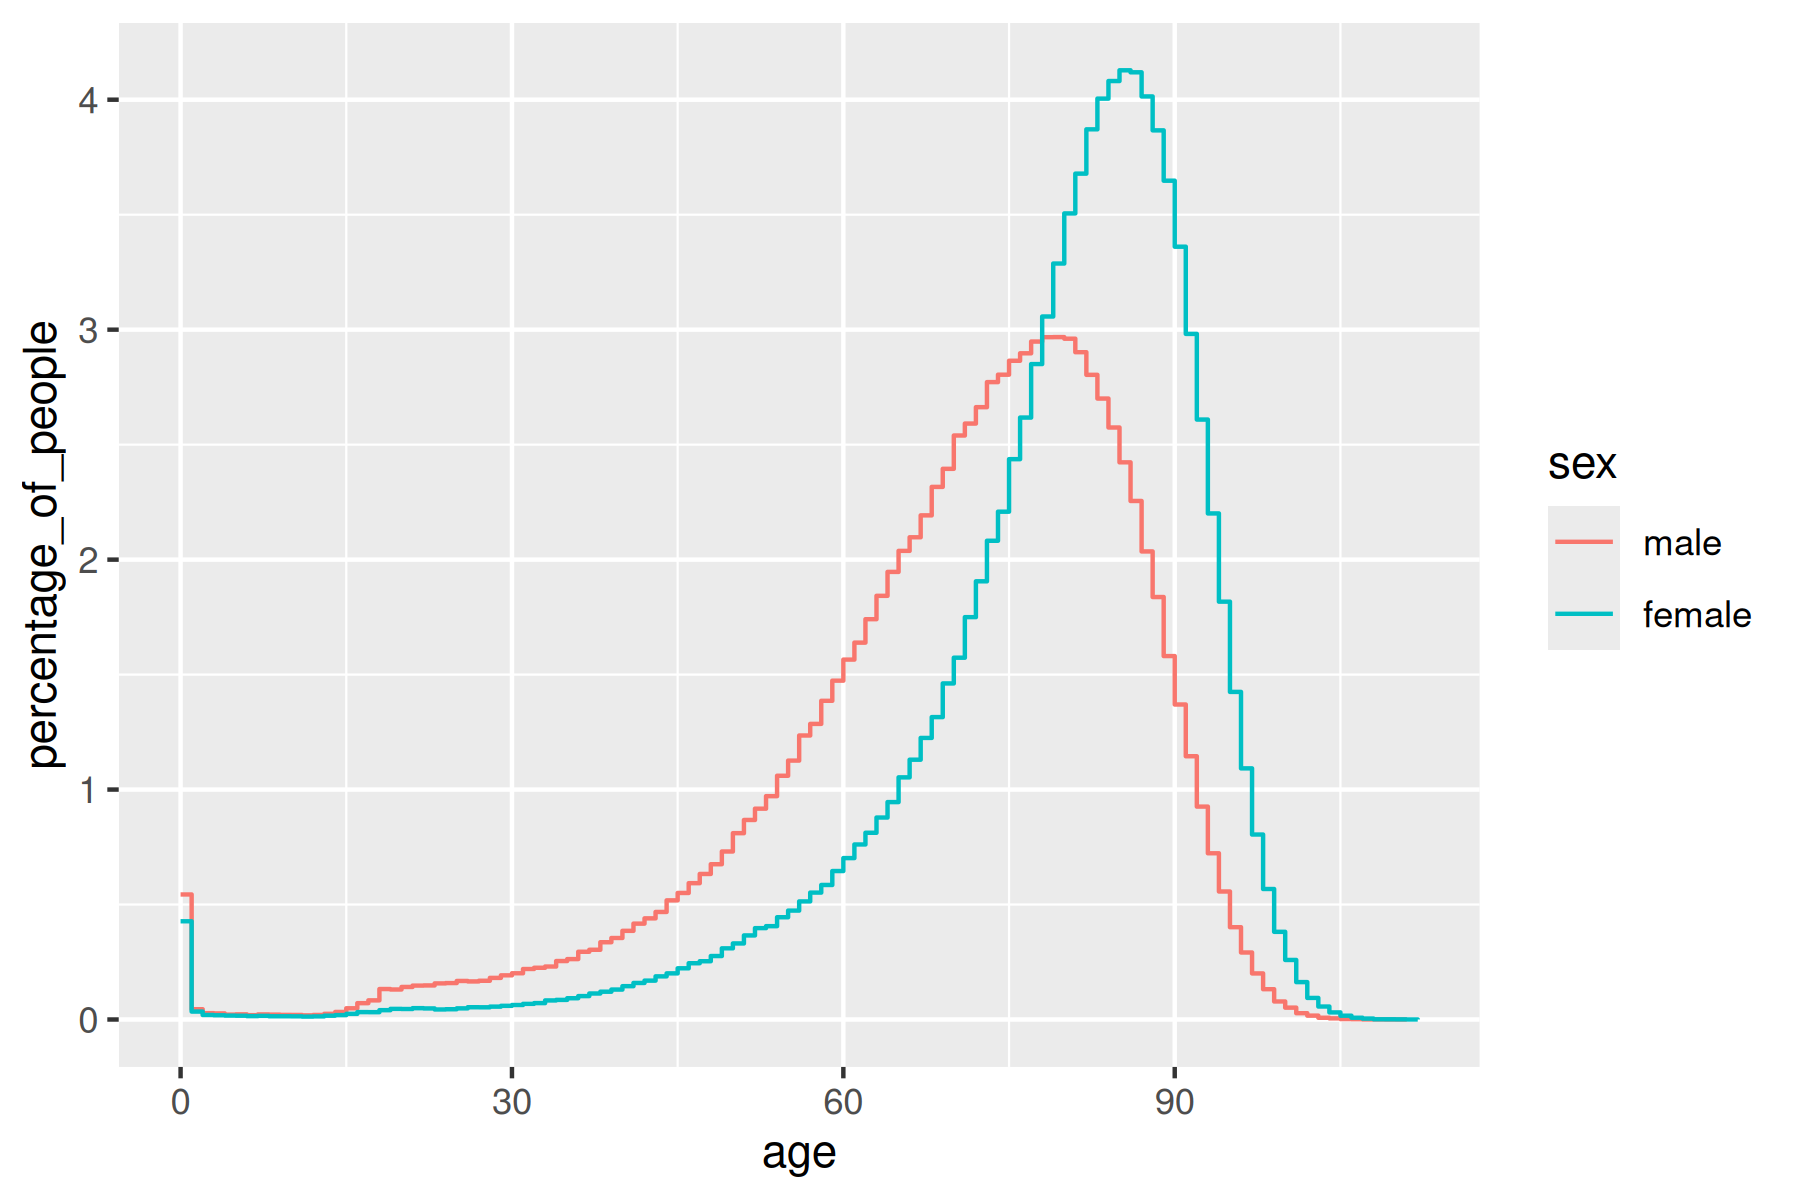

In [36]:
finnish_deaths |>
  group_by(sex, age) |> # group by sex and age
  summarise(n_people=n(), .groups="drop") |> # calculate the number of people dying by sex and age
  group_by(sex) |>
  mutate(percentage_of_people=n_people / sum(n_people) * 100) |>
  ggplot(aes(x=age, y=percentage_of_people, fill=sex, colour=sex)) +
  geom_step()


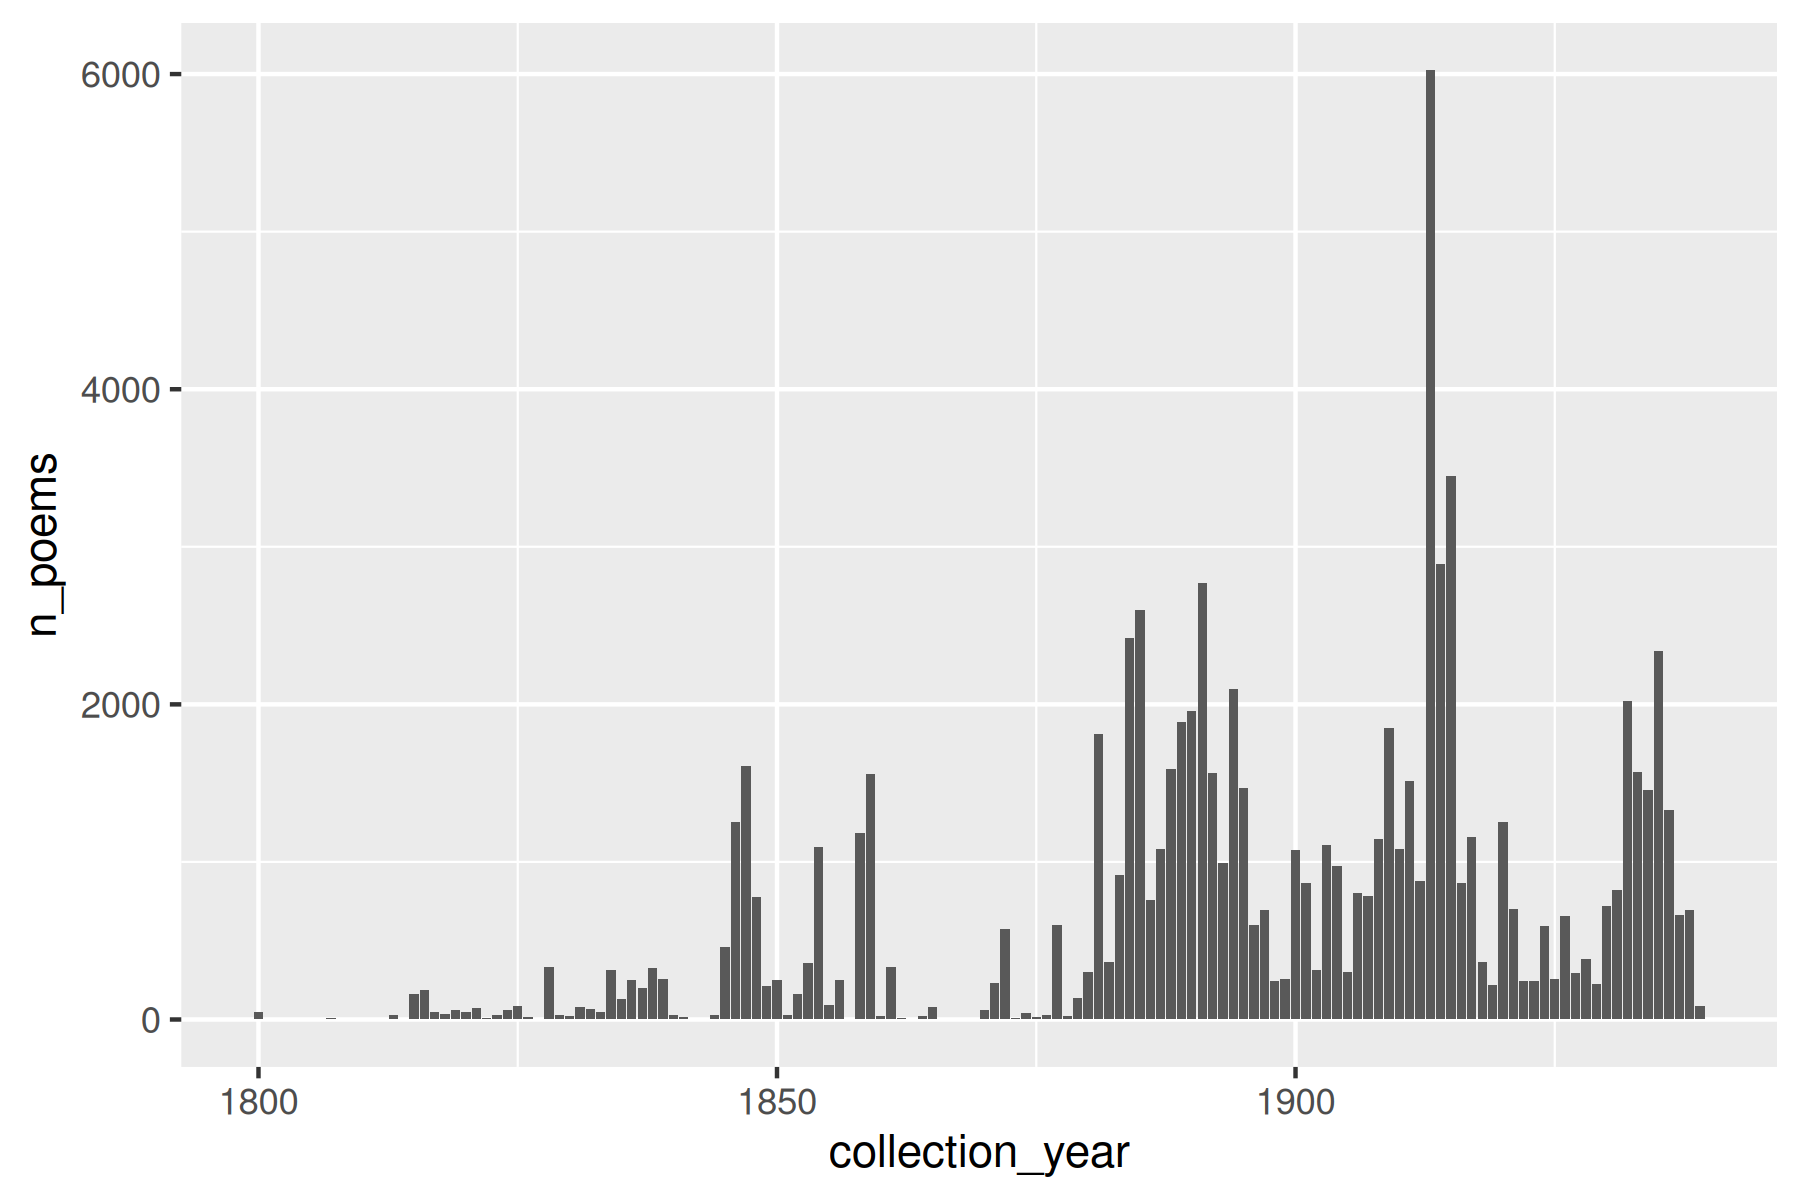

In [50]:
skvr |>
  filter(collection_year >= 1800) |> 
  group_by(collection_year) |>
  summarise(n_poems=n(), n_verses=sum(n_verses)) |>
  ggplot(aes(x=collection_year,y=n_poems)) +
  geom_col()

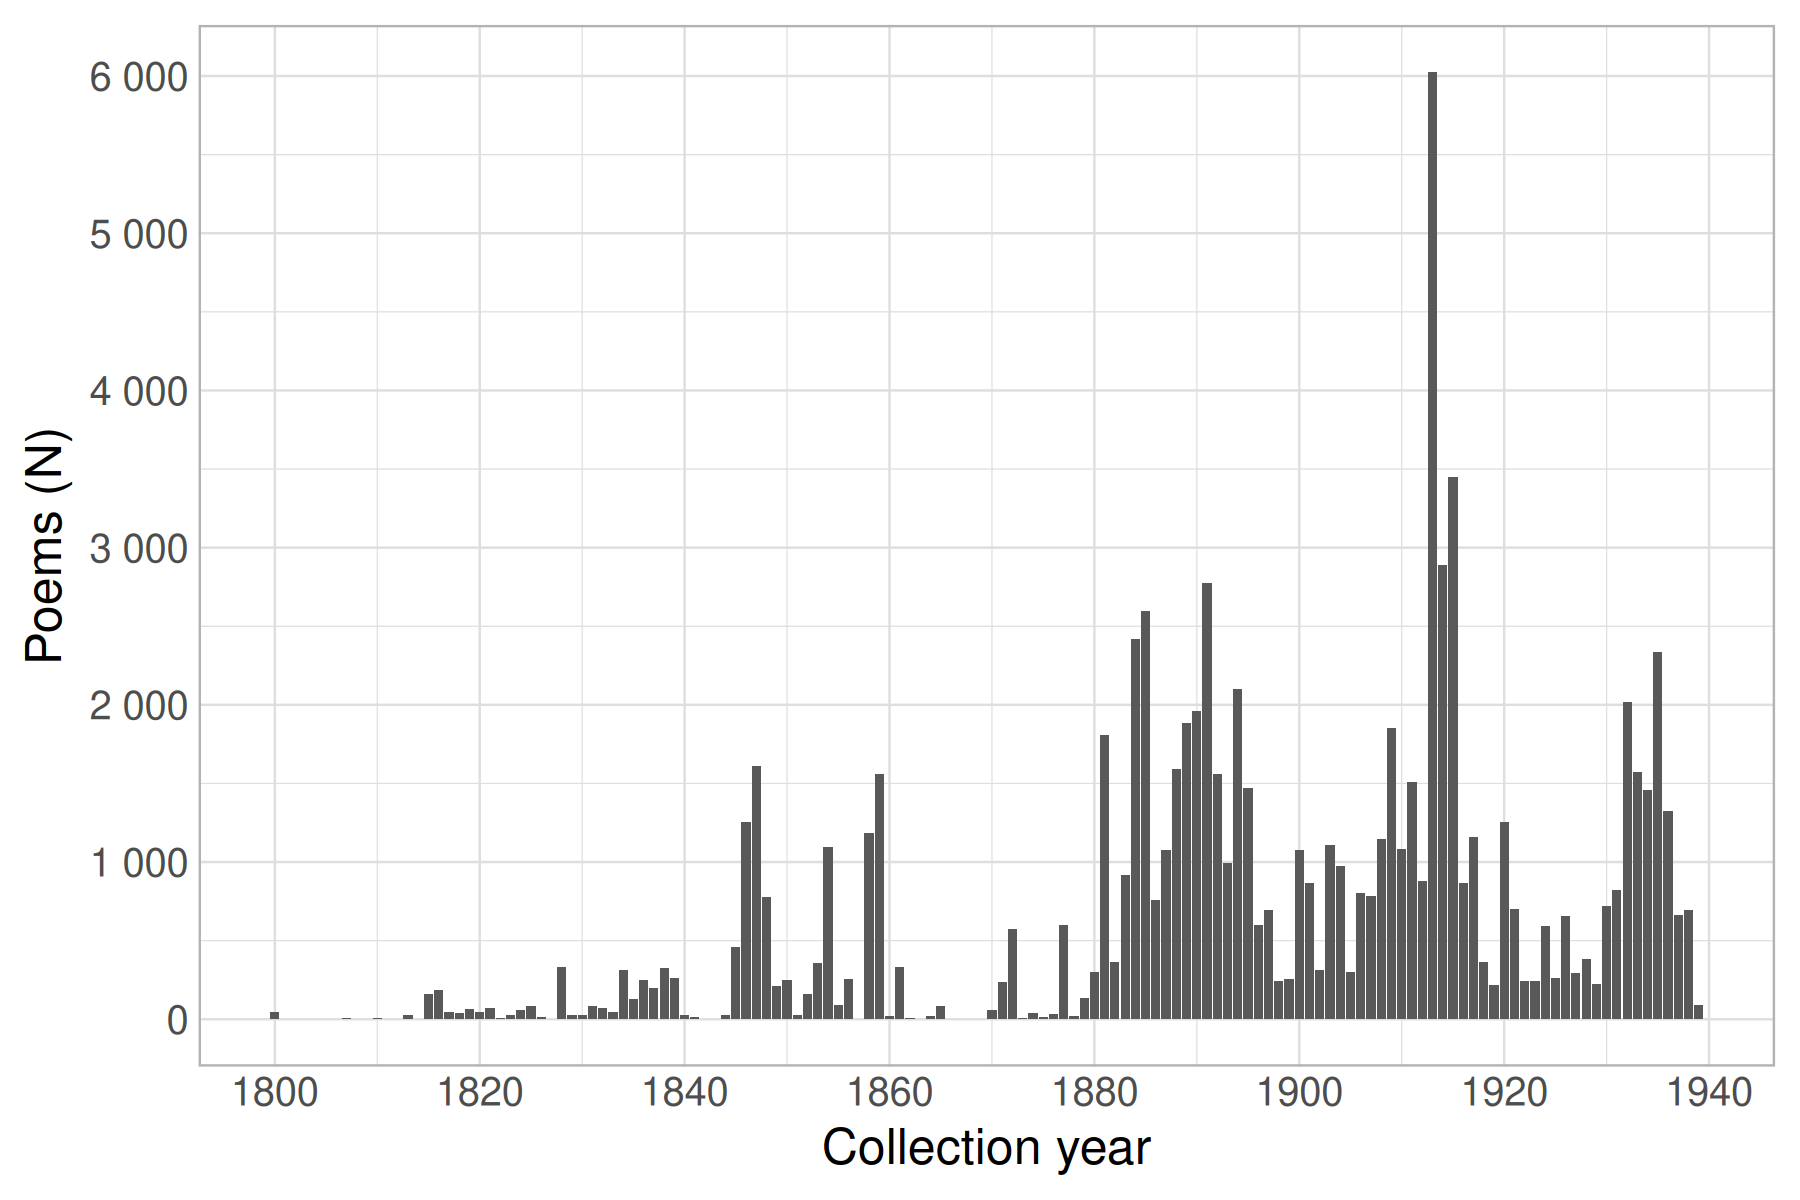

In [49]:
skvr |>
  filter(collection_year >= 1800) |> 
  group_by(collection_year) |>
  summarise(n_poems=n(), n_verses=sum(n_verses)) |>
  ggplot(aes(x=collection_year,y=n_poems)) +
  geom_col() +
  scale_x_continuous(n.breaks=10) +
  scale_y_continuous(n.breaks=10, labels=scales::number) +
  labs(x="Collection year", y="Poems (N)") +
  theme_hsci_discrete()

In [32]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

Warning message:
“Removed 1018 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


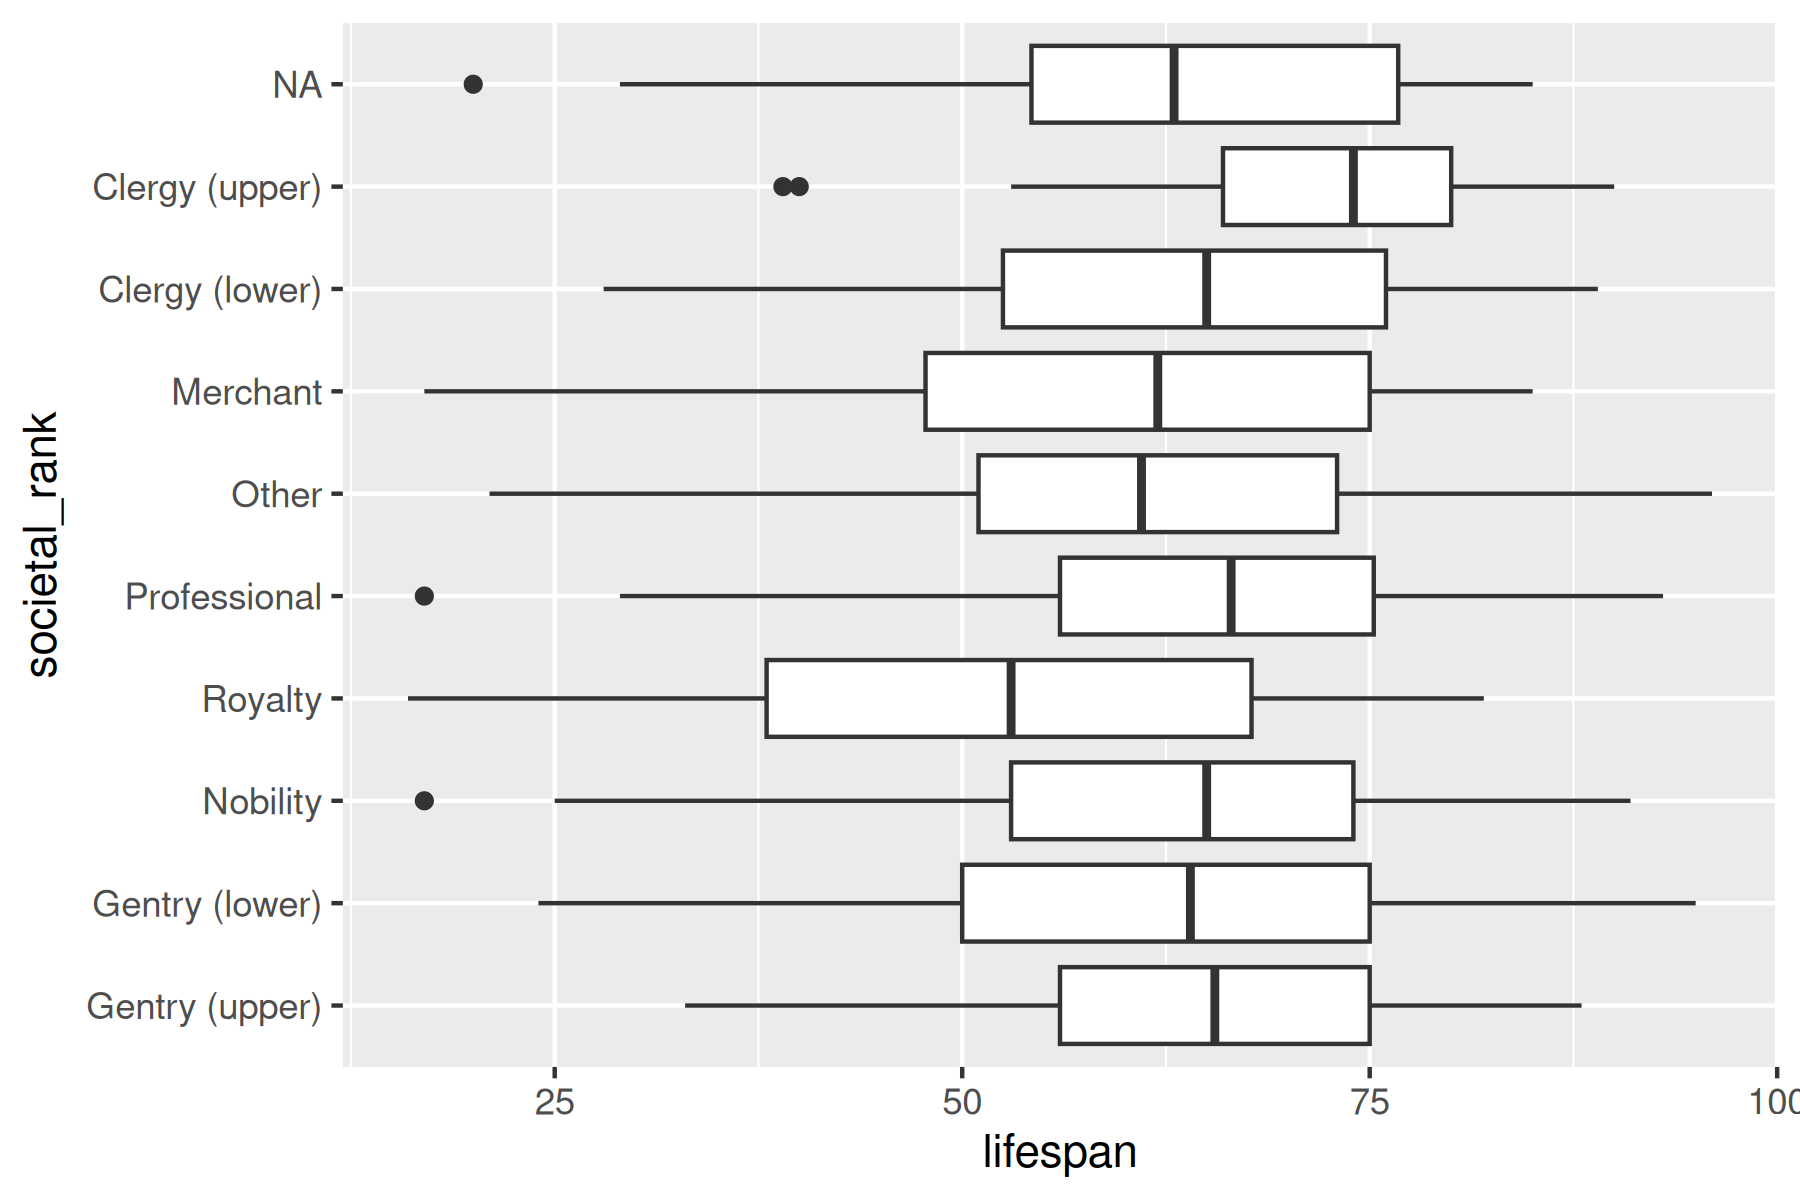

In [55]:
ceec_people |>
  mutate(lifespan = year_of_death - year_of_birth) |>
  ggplot(aes(x=societal_rank, y=lifespan)) +
  geom_boxplot() + 
  coord_flip()

Warning message:
“Removed 1018 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1018 rows containing missing values or values outside the scale range
(`geom_point()`).”


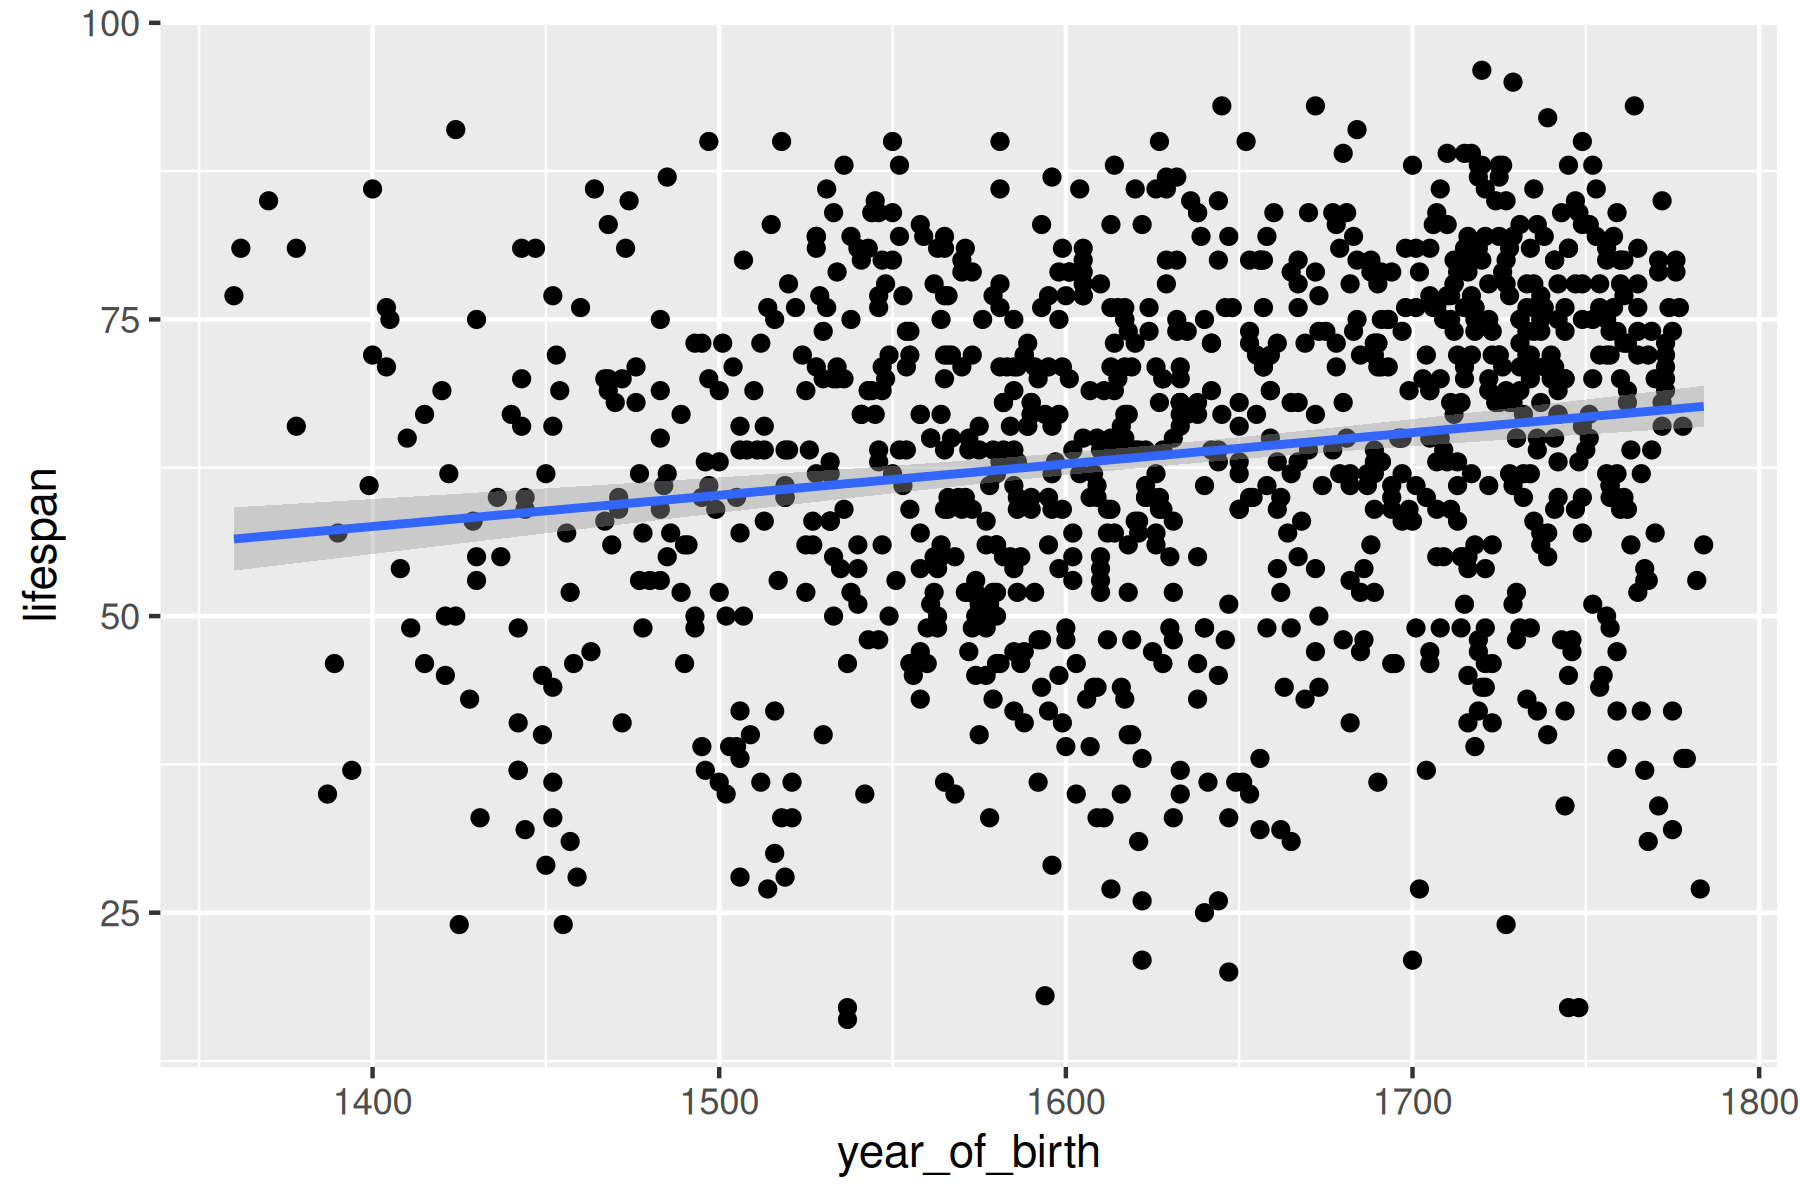

In [70]:
ceec_people |>
  mutate(lifespan = year_of_death - year_of_birth, decade_of_birth = as.factor(floor(year_of_birth / 10) * 10)) |>
  ggplot(aes(x=year_of_birth, y=lifespan)) +
  geom_point() +
  geom_smooth(method = lm, formula = y ~ x)

Warning message:
“Removed 1018 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


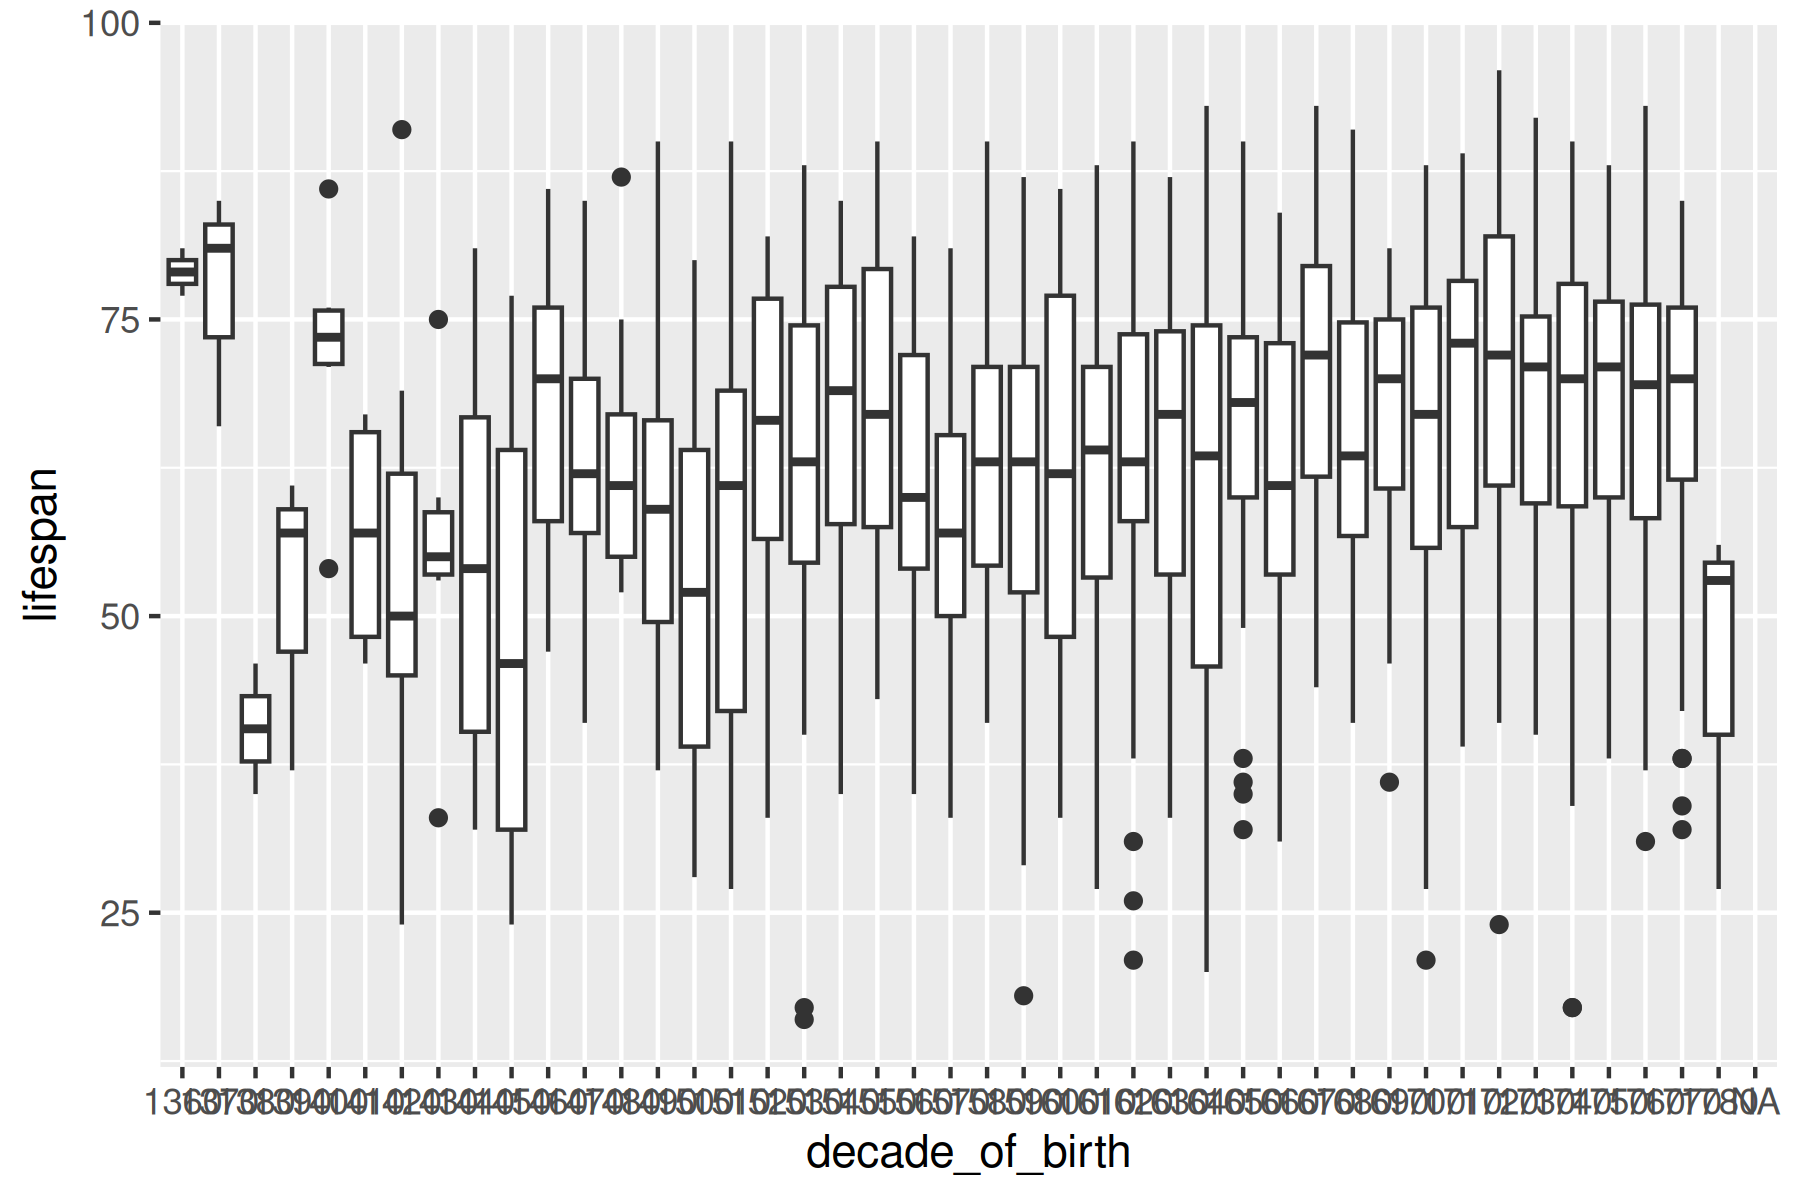

In [71]:
ceec_people |>
  mutate(lifespan = year_of_death - year_of_birth, decade_of_birth = as.factor(floor(year_of_birth / 10) * 10)) |>
  ggplot(aes(x=decade_of_birth, y=lifespan)) +
  geom_boxplot()

In [73]:
ceec_people |> count(level_of_education)

level_of_education,n
<fct>,<int>
Higher,579
Private,49
Apprenticed,64
Secondary,31
Elementary,6
NA,1321
